In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('minihomeprices.csv')

In [7]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [9]:
df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [10]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [11]:
df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )

In [12]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


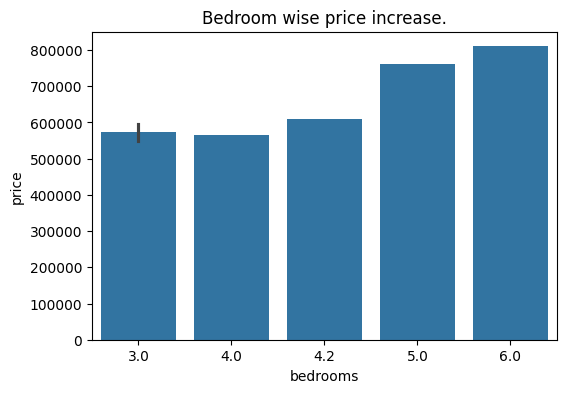

In [16]:
plt.figure(figsize=(6, 4))
plt.title("Bedroom wise price increase.")
sns.barplot(x='bedrooms', y='price', data=df)
plt.show()

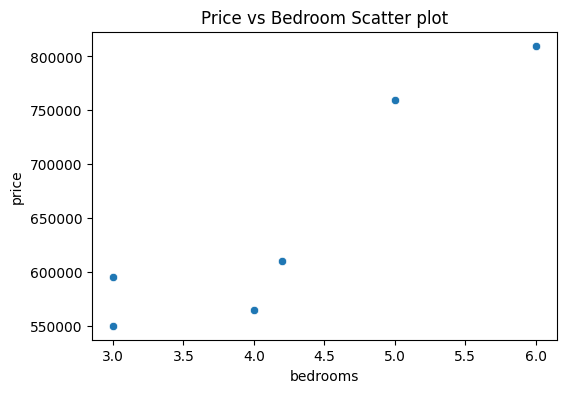

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bedrooms', y='price',data=df)
plt.title("Price vs Bedroom Scatter plot")
plt.show()

<Figure size 600x400 with 0 Axes>

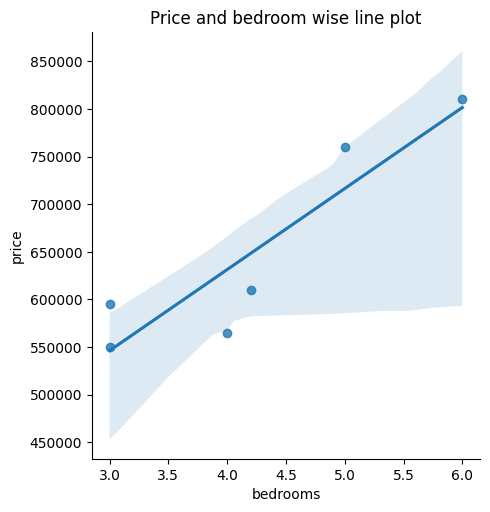

In [12]:
plt.figure(figsize=(6, 4))
sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
x = df.drop(['price'], axis=1)
y = df['price']

In [32]:
df['bedrooms'] = df['bedrooms'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [16]:
print(x)
print("-" * 25)
print(y)


   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [21]:
lr.fit( x, y )
LinearRegression()

LinearRegression()

In [22]:
lr.predict([ [4000, 2, 50 ]])

array([551989.04870256])

In [35]:
lr.coef_


array([  116.66950551, 18756.28806982, -3675.75111708])

In [37]:
lr.intercept_

231586.00639409182

In [39]:
score = lr.score( x, y )
print(score*100 )


95.48066640165118
